In [ ]:
import pandas as pd
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]



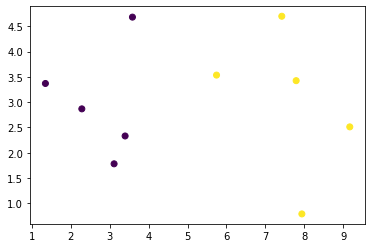

In [ ]:
import matplotlib.pyplot as plt
df = pd.DataFrame(dataset)
plt.scatter(df[0],df[1], c=df[2])

In [ ]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

separated = separate_by_class(dataset)

In [ ]:
separated[1]

[[7.423436942, 4.696522875, 1],
 [5.745051997, 3.533989803, 1],
 [9.172168622, 2.511101045, 1],
 [7.792783481, 3.424088941, 1],
 [7.939820817, 0.791637231, 1]]

In [ ]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
from math import sqrt

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)
 

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

summary = summarize_dataset(dataset)
summary

[(5.178333386499999, 2.7665845055177263, 10),
 (2.9984683241, 1.218556343617447, 10)]

In [ ]:
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

In [ ]:
summarize_by_class(dataset)

{0: [(2.7420144012, 0.9265683289298018, 5),
  (3.0054686692, 1.1073295894898725, 5)],
 1: [(7.6146523718, 1.2344321550313704, 5),
  (2.9914679790000003, 1.4541931384601618, 5)]}

In [ ]:
from math import sqrt
from math import pi
from math import exp
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [ ]:
calculate_probability(2.7420144012,0.92, 9.17)

0.042654808645052965

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


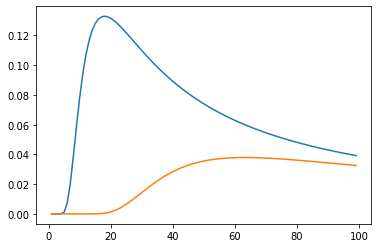

In [ ]:
import numpy as np
x1 = [calculate_probability(2.74,0.92,x) for x in np.linspace(0,10,100)]
x2 = [calculate_probability(7.61,1.23,x) for x in np.linspace(0,10,100)]
plt.plot(x1)
plt.plot(x2)


In [ ]:
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities


summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[7])
print(probabilities)

{0: 2.44629984336952e-12, 1: 0.018937264964228803}


In [ ]:
df = pd.read_csv('iris.csv',header=None)
df[4]=df[4].astype('category').cat.codes

In [ ]:
summaries = summarize_by_class(df.to_numpy())
summaries

{0.0: [(5.005999999999999, 0.3524896872134512, 50),
  (3.4180000000000006, 0.38102439795469095, 50),
  (1.464, 0.1735111594364455, 50),
  (0.2439999999999999, 0.10720950308167837, 50)],
 1.0: [(5.936, 0.5161711470638635, 50),
  (2.7700000000000005, 0.3137983233784114, 50),
  (4.26, 0.46991097723995806, 50),
  (1.3259999999999998, 0.197752680004544, 50)],
 2.0: [(6.587999999999998, 0.635879593274432, 50),
  (2.9739999999999998, 0.3224966381726376, 50),
  (5.552, 0.5518946956639835, 50),
  (2.026, 0.27465005563666733, 50)]}

In [ ]:
calculate_class_probabilities(summaries, [5.0,3.6,1.4,0.2,0])

{0.0: 2.5890061173739514,
 1.0: 2.702798311974989e-18,
 2.0: 2.3607221382040533e-25}

In [ ]:
splits = 5
from random import shuffle

data = df.to_numpy()
shuffle(data)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(df)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:

def get_class(class_dict):
  cl = -1
  max = -1
  for c,p in class_dict.items():
    if p>max:
      cl=c
      max=p
  return(cl)

errors =[]
for train_index, test_index in kf.split(df):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = df.iloc[train_index], df.iloc[test_index]
  summaries = summarize_by_class(X_train.to_numpy())

  for i,row in X_test.iterrows():
    classes = calculate_class_probabilities(summaries, row.to_numpy())
    cl = get_class(classes)
    errors.append(abs(row[4]-cl))
  

In [ ]:
mean(errors)

0.05333333333333334

### Practice dataset

Wisconsin Breast Cancer Dataset
https://www.kaggle.com/priyanka841/breast-cancer-wisconsin

Look at distribution of features and seee if normal/gausssian fits. If not -- what distribution should we use? 

Play with feature selection -- what features contribute to improvement and what don't?

Use k-fold to validate

